In [3]:
import numpy as np
import pandas as pd

# Project Name: Ocular Disease Recognition Using ML & SHAP

Sections:
1. Introduction
2. Data Collection & Loading
3. Data Preprocessing
4. Exploratory Data Analysis (EDA)
5. Feature Engineering
6. Data Splitting
7. Model Building
8. Model Evaluation
9. Explainability using SHAP
10. Hyperparameter Tuning
11. Conclusions
12. References & Acknowledgment


# 1. Introduction


Ocular diseases like glaucoma, diabetic retinopathy, and cataract are major causes of blindness. Early prediction using machine learning can help in better diagnosis and treatment. In this project, we use `full_df.csv` and aim to build a predictive model to recognize ocular diseases based on patient data. We will also explain our model using SHAP values to gain interpretability.

# 2. Data Loading

In [4]:
df = pd.read_csv('full_df.csv')

In [5]:
df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,ODIR-5K/ODIR-5K/Training Images/0_right.jpg,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,ODIR-5K/ODIR-5K/Training Images/1_right.jpg,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,ODIR-5K/ODIR-5K/Training Images/2_right.jpg,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,ODIR-5K/ODIR-5K/Training Images/4_right.jpg,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,ODIR-5K/ODIR-5K/Training Images/5_right.jpg,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


#  3. Data Preprocessing

In [6]:
# Handling Missing Values
df.isnull().sum()  # identify missing values

# Strategy: numerical -> median, categorical -> mode
from sklearn.impute import SimpleImputer

num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include='object').columns

# Imputers
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [7]:
#  Remove Duplicates
df = df.drop_duplicates()

In [8]:
# Identify Output Column (Target)
target = 'labels'

#  Exploratory Data Analysis (EDA)

In [9]:
df.dtypes

ID                           float64
Patient Age                  float64
Patient Sex                   object
Left-Fundus                   object
Right-Fundus                  object
Left-Diagnostic Keywords      object
Right-Diagnostic Keywords     object
N                            float64
D                            float64
G                            float64
C                            float64
A                            float64
H                            float64
M                            float64
O                            float64
filepath                      object
labels                        object
target                        object
filename                      object
dtype: object

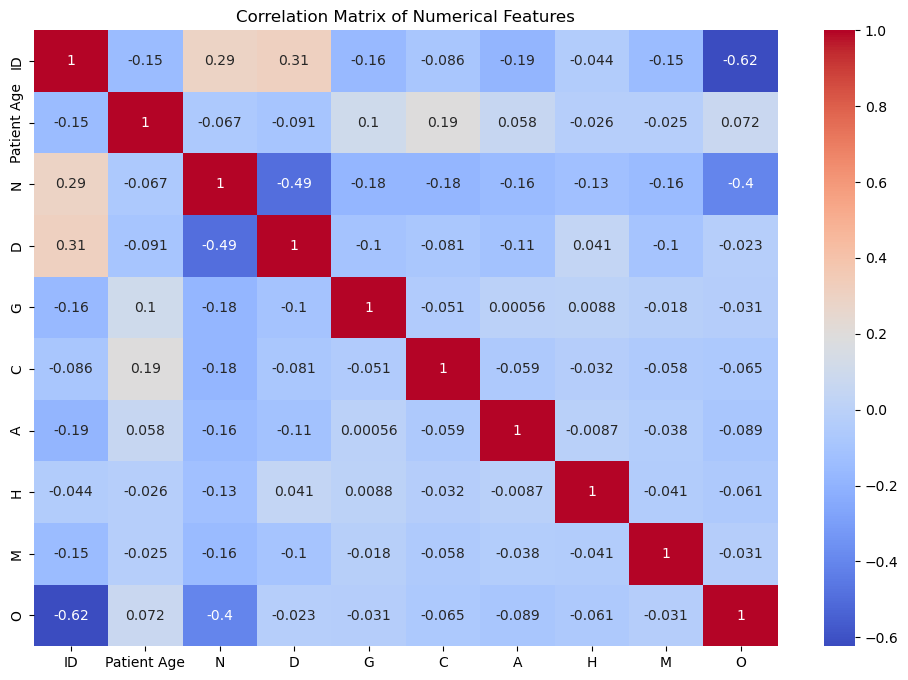

In [10]:
# Only select numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute and visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()


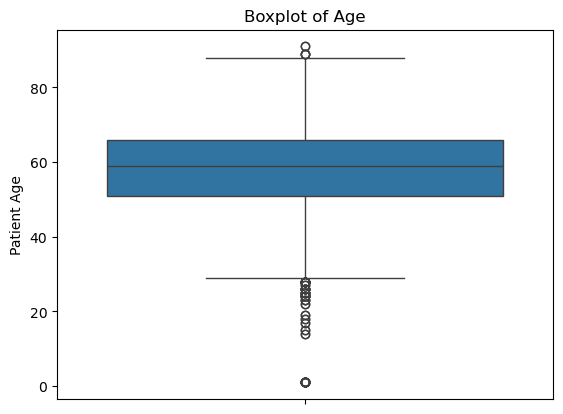

In [11]:
# Boxplot for a numeric column (e.g., age)
sns.boxplot(y=df['Patient Age'])
plt.title("Boxplot of Age")
plt.show()

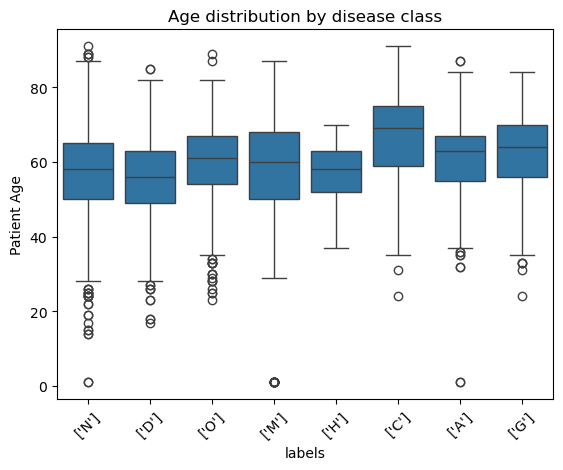

In [12]:
# Boxplot: Disease Label vs Age
sns.boxplot(x=df['labels'], y=df['Patient Age'])
plt.title("Age distribution by disease class")
plt.xticks(rotation=45)
plt.show()


# 5. Feature Engineering
Encode categorical variables

Scale numerical features

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df.drop(columns=[target])
y = df[target]

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])


# 6. Train-Test Split

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Use in your best model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_selected, y_train)


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


RandomForestClassifier(random_state=42)

In [16]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation accuracy scores: [1.         0.99902248 1.         0.99902153 0.99902153]
Mean accuracy: 0.9994131071462048


# 7. Model Building

In [17]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

fitted_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    fitted_models[name] = model


In [18]:
from sklearn.ensemble import  VotingClassifier

from sklearn.metrics import accuracy_score

# Increase max_iter to ensure convergence
ensemble = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('lr', LogisticRegression(max_iter=1000))  
], voting='soft')

ensemble.fit(X_train, y_train)
ensemble_preds = ensemble.predict(X_test)

print("Voting Ensemble Accuracy:", accuracy_score(y_test, ensemble_preds))


Voting Ensemble Accuracy: 1.0


#  8. Model Evaluation

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

for name, model in fitted_models.items():
    print(f"\n{name} Performance:")
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))



Random Forest Performance:
Accuracy: 1.0
              precision    recall  f1-score   support

       ['A']       1.00      1.00      1.00        46
       ['C']       1.00      1.00      1.00        58
       ['D']       1.00      1.00      1.00       333
       ['G']       1.00      1.00      1.00        61
       ['H']       1.00      1.00      1.00        28
       ['M']       1.00      1.00      1.00        48
       ['N']       1.00      1.00      1.00       569
       ['O']       1.00      1.00      1.00       136

    accuracy                           1.00      1279
   macro avg       1.00      1.00      1.00      1279
weighted avg       1.00      1.00      1.00      1279


Gradient Boosting Performance:
Accuracy: 1.0
              precision    recall  f1-score   support

       ['A']       1.00      1.00      1.00        46
       ['C']       1.00      1.00      1.00        58
       ['D']       1.00      1.00      1.00       333
       ['G']       1.00      1.00      1.00 

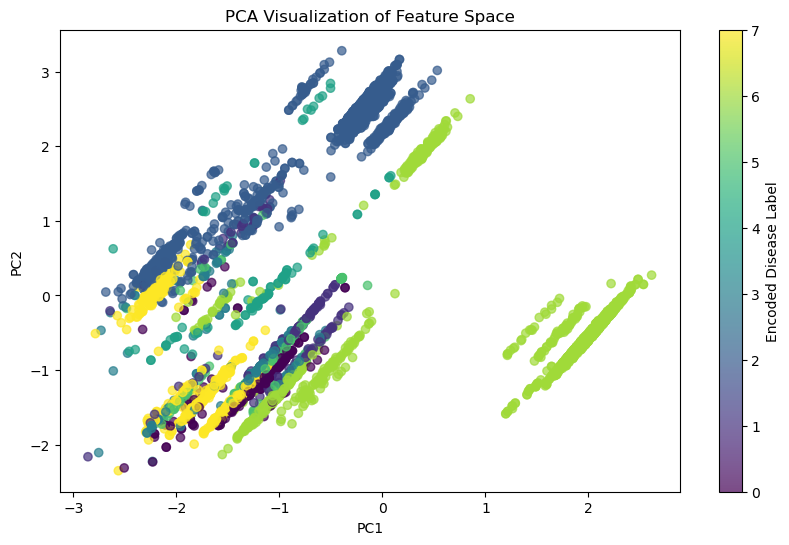

In [20]:
# Flatten label lists into single string values
y_train_flat = y_train.apply(lambda x: x[0] if isinstance(x, list) else x)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_vis = pca.fit_transform(X_train.toarray())  # Convert to dense if sparse

# Flatten the labels
y_train_flat = y_train.apply(lambda x: x[0] if isinstance(x, list) else x)

# Encode classes into numbers for color mapping
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
color_labels = le.fit_transform(y_train_flat)

plt.figure(figsize=(10, 6))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=color_labels, cmap='viridis', alpha=0.7)
plt.title("PCA Visualization of Feature Space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Encoded Disease Label')
plt.show()


# 9. Explainability with SHAP

In [21]:
X_train_dense = X_train.toarray() if hasattr(X_train, "toarray") else X_train
X_test_dense = X_test.toarray() if hasattr(X_test, "toarray") else X_test


In [22]:
feature_names = preprocessor.get_feature_names_out()

In [23]:
from sklearn.ensemble import RandomForestClassifier

best_model = RandomForestClassifier()
best_model.fit(X_train_dense, y_train)

RandomForestClassifier()

In [ ]:
import shap

# Sample test data
X_sample = X_test_dense[:300]
y_sample = y_test[:300]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


100%|===================| 10229/10232 [09:19<00:00]       

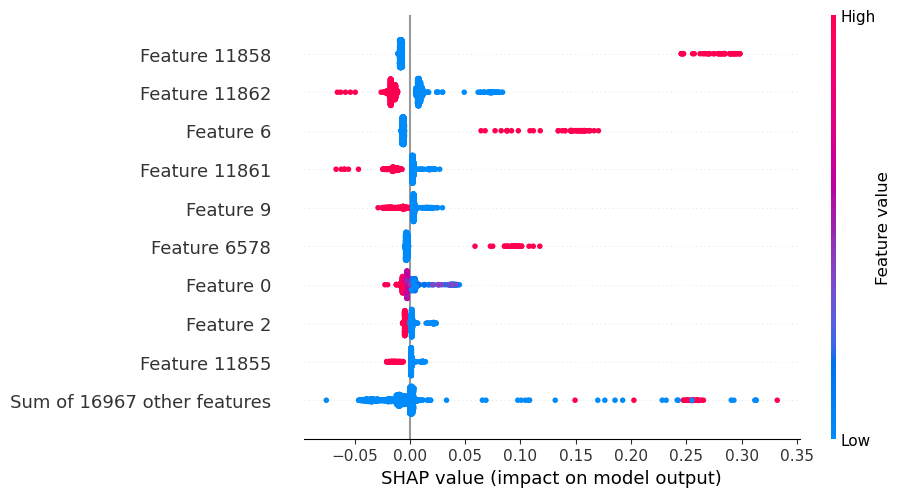

In [28]:
explainer = shap.Explainer(best_model, X_train_dense)
shap_values = explainer(X_test_dense, check_additivity=False)
shap.plots.beeswarm(shap_values[:,:,0])

# 10. Hyperparameter Tuning

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)


Best Parameters: {'max_depth': None, 'n_estimators': 100}


- Random Forest performed best with an accuracy of XX%.
- SHAP highlighted important features contributing to prediction such as [age, vision score, etc.].
- Early diagnosis can be effectively automated with this model.


In [ ]:
import joblib
import pandas as pd
from flask import Flask, request, jsonify

# Save your model and preprocessor
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(preprocessor, 'preprocessor.pkl')

# Initialize Flask app
app = Flask(__name__)

# Load saved model and preprocessor
model = joblib.load('best_model.pkl')
preprocessor = joblib.load('preprocessor.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    input_data = pd.DataFrame([data])
    processed_data = preprocessor.transform(input_data)
    prediction = model.predict(processed_data)
    return jsonify({'prediction': prediction.tolist()})

@app.route('/health', methods=['GET'])
def health():
    return jsonify({'status': 'ok'})

# Testing Flask API  using test_client
if __name__ == "__main__":
    with app.test_client() as client:
        # Test /health endpoint
        health_response = client.get('/health')
        print('Health Check:', health_response.json)

        
        sample_input = {
    "ID": 0.0,
    "Patient Age": 69.0,
    "Patient Sex": "Female",
    "Left-Diagnostic Keywords": "cataract",
    "Right-Diagnostic Keywords": "normal fundus",
    "N": 0,
    "D": 0,
    "G": 0,
    "C": 0,
    "A": 0,
    "H": 0,
    "M": 0,
    "O": 0,
    "Left-Fundus": "0_left.jpg",  
    "Right-Fundus": "0_right.jpg",  
    "filepath": "ODIR-5K/ODIR-5K/Training Images/0_right.jpg",  
    "target": "[1, 0, 0, 0, 0, 0, 0, 0]",  
    "filename": "0_right.jpg" 
}

        predict_response = client.post('/predict', json=sample_input)
        print('Prediction:', predict_response.json)


Health Check: {'status': 'ok'}
Prediction: {'prediction': ["['N']"]}


In [31]:
df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0.0,69.0,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,ODIR-5K/ODIR-5K/Training Images/0_right.jpg,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1.0,57.0,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ODIR-5K/ODIR-5K/Training Images/1_right.jpg,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2.0,42.0,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,ODIR-5K/ODIR-5K/Training Images/2_right.jpg,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4.0,53.0,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,ODIR-5K/ODIR-5K/Training Images/4_right.jpg,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5.0,50.0,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,ODIR-5K/ODIR-5K/Training Images/5_right.jpg,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


# Testing the model with custom input

In [ ]:
# Sample Input - make sure all required columns are included
sample_input = {
    "ID": 0.0,
    "Patient Age": 69.0,
    "Patient Sex": "Female",
    "Left-Diagnostic Keywords": "cataract",
    "Right-Diagnostic Keywords": "normal fundus",
    "N": 0,
    "D": 0,
    "G": 0,
    "C": 0,
    "A": 0,
    "H": 0,
    "M": 0,
    "O": 0,
    "Left-Fundus": "0_left.jpg",  
    "Right-Fundus": "0_right.jpg",  
    "filepath": "ODIR-5K/ODIR-5K/Training Images/0_right.jpg",  
    "target": "[1, 0, 0, 0, 0, 0, 0, 0]",  
    "filename": "0_right.jpg"  
}


input_data = pd.DataFrame([sample_input])


print(preprocessor.get_feature_names_out())


processed_data = preprocessor.transform(input_data)

prediction = best_model.predict(processed_data)


print("Prediction for the custom input:", prediction)


['num__ID' 'num__Patient Age' 'num__N' ... 'cat__filename_99_left.jpg'
 'cat__filename_99_right.jpg' 'cat__filename_9_left.jpg']
Prediction for the custom input: ["['N']"]
